# Demonstrating 2D LSTM Autoencoders

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense,RepeatVector, TimeDistributed, Dense, Dropout, LSTM
from tensorflow.python.keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Read The Data

In [2]:
df = pd.read_csv('data/Sample.csv', parse_dates=['Time Stamp'], index_col='Time Stamp')
df.head(n=5)  # visualize the data.

,Class,Confidence
Time Stamp,,
1602438412,1,0.84
1602438413,2,0.73
1602438414,3,0.51
1602438415,4,0.49
1602438416,5,0.97


Create Data for LSTM Input ( Series of Data i.e here create a series of data with time_steps number of elements)

In [3]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [4]:
# Timesteps will define how many Elements we have
TIME_STEPS = 5

X_train, y_train = create_dataset(df, df, TIME_STEPS)


print(X_train.shape)

(20, 5, 2)


In [5]:
print(X_train)

[[[1.    0.84 ]
  [2.    0.73 ]
  [3.    0.51 ]
  [4.    0.49 ]
  [5.    0.97 ]]

 [[2.    0.73 ]
  [3.    0.51 ]
  [4.    0.49 ]
  [5.    0.97 ]
  [1.    0.78 ]]

 [[3.    0.51 ]
  [4.    0.49 ]
  [5.    0.97 ]
  [1.    0.78 ]
  [2.    0.65 ]]

 [[4.    0.49 ]
  [5.    0.97 ]
  [1.    0.78 ]
  [2.    0.65 ]
  [3.    0.41 ]]

 [[5.    0.97 ]
  [1.    0.78 ]
  [2.    0.65 ]
  [3.    0.41 ]
  [4.    0.32 ]]

 [[1.    0.78 ]
  [2.    0.65 ]
  [3.    0.41 ]
  [4.    0.32 ]
  [5.    0.52 ]]

 [[2.    0.65 ]
  [3.    0.41 ]
  [4.    0.32 ]
  [5.    0.52 ]
  [1.    0.46 ]]

 [[3.    0.41 ]
  [4.    0.32 ]
  [5.    0.52 ]
  [1.    0.46 ]
  [2.    0.85 ]]

 [[4.    0.32 ]
  [5.    0.52 ]
  [1.    0.46 ]
  [2.    0.85 ]
  [3.    0.96 ]]

 [[5.    0.52 ]
  [1.    0.46 ]
  [2.    0.85 ]
  [3.    0.96 ]
  [4.    0.78 ]]

 [[1.    0.46 ]
  [2.    0.85 ]
  [3.    0.96 ]
  [4.    0.78 ]
  [5.    0.14 ]]

 [[2.    0.85 ]
  [3.    0.96 ]
  [4.    0.78 ]
  [5.    0.14 ]
  [1.    0.65 ]]

 [[3.    0.96 ]


Size of Input Data  is n_samples * timesteps * n_features 

## Create the LSTM AUTOENCODER MODEL

In [7]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 128)            131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 2)              258       
Total params: 198,914
Trainable params: 198,914
Non-trainable params: 0
__________________________________________________

## Train the Model 

In [8]:
history = model.fit(X_train, X_train, epochs=200, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)


Train on 18 samples, validate on 2 samples
Epoch 1/200
18/18 [==============================] - 3s 162ms/sample - loss: 1.7713 - val_loss: 1.6637
Epoch 2/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.6562 - val_loss: 1.5618
Epoch 3/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.5491 - val_loss: 1.4506
Epoch 4/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.4377 - val_loss: 1.3408
Epoch 5/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.3235 - val_loss: 1.2277
Epoch 6/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.2430 - val_loss: 1.1213
Epoch 7/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.1677 - val_loss: 1.0242
Epoch 8/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.0869 - val_loss: 0.9438
Epoch 9/200
18/18 [==============================] - 0s 1ms/sample - loss: 1.0336 - val_loss: 0.8825
Epoch 10/200
18/18 [==========================

## Visualize Training

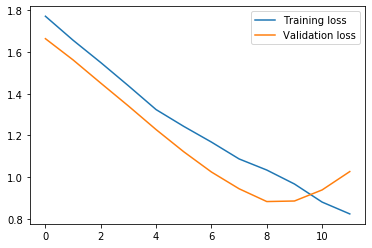

In [9]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

## Test the AUTOENCODER

In [10]:
#Create a new test data close to what model has seen and check the MSE
test1 = np.array([[ 1, 0.7],
                [2, 0.86],
                [2.9, 0.85],
                [4.1, 0.64],
                [5,0.89]])

test = np.reshape(test1,newshape=(-1,5,2))
y = model.predict(test)
y = y.reshape(5,2)
print(" THE MSE IS  : " ,sklearn.metrics.mean_squared_error(test1, y))
print("The Recreated Output is : ",y)

 THE MSE IS  :  0.09770384336959057
The Recreated Output is :  [[1.1208125  0.33779058]
 [2.170816   0.5113479 ]
 [3.0839798  0.5797549 ]
 [3.819326   0.5880815 ]
 [4.376938   0.5675875 ]]


Here the model is able to recreate the input with low Error

In [11]:
#Create a new test data close to what model has NOT seen and check the MSE
test2 = np.array([[ 1, 0.74],
                  [6, 0.60],
                  [7, 0.96],
                  [8, 0.42],
                  [5,0.85]])

test = np.reshape(test2,newshape=(-1,5,2))
y = model.predict(test)
y = y.reshape(5,2)
print(" THE MSE IS  : " ,sklearn.metrics.mean_squared_error(test2, y))
print("The Recreated Output is : ",y)

 THE MSE IS  :  2.5207483415118306
The Recreated Output is :  [[1.6618627  0.4883529 ]
 [3.1379414  0.71685326]
 [4.2798247  0.7910608 ]
 [5.0690384  0.79329824]
 [5.580368   0.7696756 ]]


Here the model is NOT able to recreate the Input as its not trained on such a data and can not extract its features